#### Desarollo del modelo Von Bertalanffy 

El modelo de Von Bertalanffy esta definido por al ecuacion:

 $\frac{dV}{dt}= aV^\gamma-bV$

Y donde la solución explicita del modelo es: 

$V(t)= (\frac{a}{b}+(aV^{1-\gamma}-\frac{a}{b})e^{-b(1-\gamma)t})^{\frac{1}{1-\gamma}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
import sympy as sp

In [2]:
#Definicion de las variables
a, b, g, t, V0, C1 = sp.symbols('a, b, g, t, V0, C1', positive = True)
V = sp.Function ('V')

In [3]:
#Descripcion del modelo
modelo_berta = sp.Eq(V(t).diff(), a*V(t)**(g)-b*V(t))
modelo_berta

Eq(Derivative(V(t), t), a*V(t)**g - b*V(t))

In [6]:
#Busqueda de las soluciones del modelo
sol_berta = sp.dsolve(modelo_berta)
sp.simplify(sol_berta[0])

Eq(V(t), Piecewise((b**(1/(g - 1))*(a + b*exp(b*(-C1*g + C1 + g*t - t)))**(-1/(g - 1)), Ne(g, 1)), (nan, True)))

Con ello sabemos la funcion la vamos a poder definir para un rango de $\gamma$ tal que $0<\gamma< 1$ 

A partir de esta condición llegamos a la solución explicita para lo que partimos de la ecuación:

$V(t)=b^{\frac{1}{g-1}}(a+be^{b(-C1g+C1+gt-t)})^{\frac{-1}{g-1}}$

In [5]:
berta_condicion = sp.Eq(V(t), b**(1/(g-1))*(a+b*sp.exp(-C1*g+C1+b*g*t-t))**(-1/(g-1)))
berta_condicion

Eq(V(t), b**(1/(g - 1))*(a + b*exp(-C1*g + C1 + b*g*t - t))**(-1/(g - 1)))

In [6]:
#Resolvemos para t=0
berta_cero = sp.Eq(V(t).subs(t,0).subs(V(0), V0), berta_condicion.rhs.subs(t, 0))
berta_cero

Eq(V0, b**(1/(g - 1))*(a + b*exp(-C1*g + C1))**(-1/(g - 1)))

In [7]:
#Calculamos el valor de la constante C1
valor_c1 = sp.solve(berta_cero, C1)
c1=sp.simplify(valor_c1[0])
c1

-log((V0**(1 - g)*(b**(1/(g - 1)))**(g - 1) - a)/b)/(g - 1)

In [8]:
solucion_berta = berta_condicion.subs(C1, c1)
sp.simplify(solucion_berta)

Eq(V(t), b**(1/(g - 1))*(a + b*exp((g*log((V0**(1 - g)*(b**(1/(g - 1)))**(g - 1) - a)/b) + t*(g - 1)*(b*g - 1) - log((V0**(1 - g)*(b**(1/(g - 1)))**(g - 1) - a)/b))/(g - 1)))**(-1/(g - 1)))

Con ello deberiamos haber conseguido una ecuacion mucho mas simplificada, tal y como se muestra en el paper que sera: 

$V(t)=(\frac{a}{b}+(Vo^{1-\gamma}-\frac{a}{b})e^{-bt(1-\gamma)})^{\frac{1}{1-\gamma}}$

Realizamos un estudio completo del modelo de Von Bertalanffy

 $\frac{dV}{dt}= aV^\gamma-bV$
 
 Para ello analizamos puntos criticos, estabilidad del sistema y parametros que definen el modelo. 

In [9]:
pt_critico = sp.solve(modelo_berta.rhs, V(t))
pt_critico

[(b/a)**(1/(g - 1))]

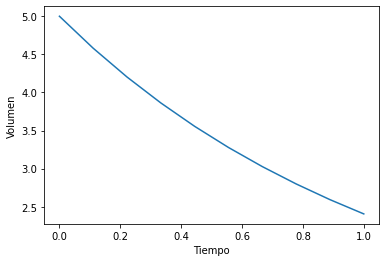

In [30]:
tiempo = np.linspace(0,1,10)

sol_exp_berta = ((a/b)+(V0**(1-g)-(a/b))*sp.exp(-b*t*(1-g)))**(1/(1-g))
sol_exp_berta1 = sp.lambdify(t, sol_exp_berta.subs({a:1.6, b:0.808, g:0.918, V0:50}))

plt.plot(tiempo, sol_exp_berta1(tiempo))
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.show()

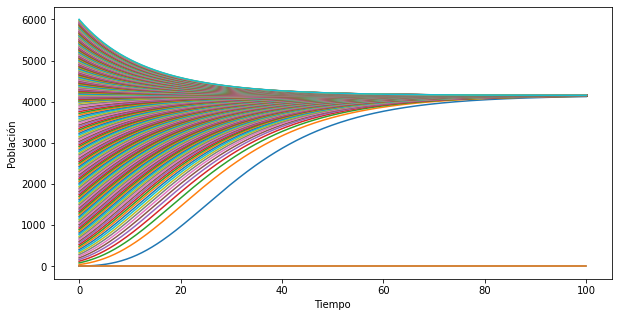

In [12]:
t, V0, a, b, g =sp.symbols('t V0 a b g')

# Alargamos la figura para que se vean mejor de las curvas
plt.figure(figsize =(10,5))

sol_exp_berta = ((a/b)+(V0**(1-g)-(a/b))*sp.exp(-b*t*(1-g)))**(1/(1-g))
# Generamos los valores de la variable independiente
t1 = np.linspace(0, 100, 300)

# Construimos varios bucles para representar las soluciones pedidas
# Para representar las soluciones constantes no se puede utilizar lambdify 
# Primero representamos las soluciones entre 0 y 250 
for ini in np.linspace(5, 4000, 100):
    solp_l = sp.lambdify(t, sol_exp_berta.subs({a:1.6, b:0.808, g:0.918, V0:ini}))
    plt.plot(t1, solp_l(t1))
# Ahora representamos las soluciones entre 250 y 450 
for ini in np.linspace(4000, 6000, 100):
    solp_l = sp.lambdify(t, sol_exp_berta.subs({a:1.6, b:0.808, g:0.918, V0:ini}))
    plt.plot(t1, solp_l(t1))
# Acabamos representando las soluciones constantes
for ini in [0, 1]:
    plt.plot(t1, ini*np.ones(300))

#  Ponemos título a los ejes
plt.xlabel('Tiempo')
plt.ylabel('Población')

# Mostramos la figura
plt.show()